In [6]:
import itertools

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [9]:
"""5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open
4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed
3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area
2 - They recorder the EEG from the area where the tumor was located
1 - Recording of seizure activity"""

ESR = pd.read_csv("../data/Epileptic_Seizure_Recognition.csv")
ESR

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


In [10]:
# Convert the dataframe to a numpy array
array = ESR.iloc[:, 1:179].to_numpy()

# Find the maximum value and its index
maxi = np.max(array)
maxi_index = np.unravel_index(np.argmax(array), array.shape)

# Find the minimum value and its index
mini = np.min(array)
mini_index = np.unravel_index(np.argmin(array), array.shape)

array

array([[ 135,  190,  229, ..., -116,  -83,  -51],
       [ 386,  382,  356, ...,  154,  143,  129],
       [ -32,  -39,  -47, ...,  -35,  -35,  -36],
       ...,
       [  14,    6,  -13, ...,   -2,   -1,   -8],
       [ -40,  -25,   -9, ...,   68,   59,   55],
       [  29,   41,   57, ...,   -2,    2,   20]])

In [11]:
# Normalize data
array = (array + abs(mini)) / (maxi + abs(mini))
array

array([[0.51373347, 0.52772126, 0.53763988, ..., 0.44989827, 0.45829095,
        0.4664293 ],
       [0.57756867, 0.57655137, 0.56993896, ..., 0.51856562, 0.51576806,
        0.51220753],
       [0.47126144, 0.46948118, 0.46744659, ..., 0.47049847, 0.47049847,
        0.47024415],
       ...,
       [0.48296033, 0.48092574, 0.47609359, ..., 0.47889115, 0.47914547,
        0.47736521],
       [0.46922686, 0.47304171, 0.47711089, ..., 0.49669379, 0.49440488,
        0.49338759],
       [0.48677518, 0.48982706, 0.49389624, ..., 0.47889115, 0.47990844,
        0.48448627]])

In [12]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(array)

# Get predicted labels and increment by 1
pred_labels = kmeans.labels_ + 1
pred_labels

array([1, 5, 1, ..., 5, 1, 5], dtype=int32)

In [13]:
# Extract original labels from the dataframe
og_labels = ESR['y'].to_numpy()
og_labels

array([4, 1, 5, ..., 5, 3, 4])

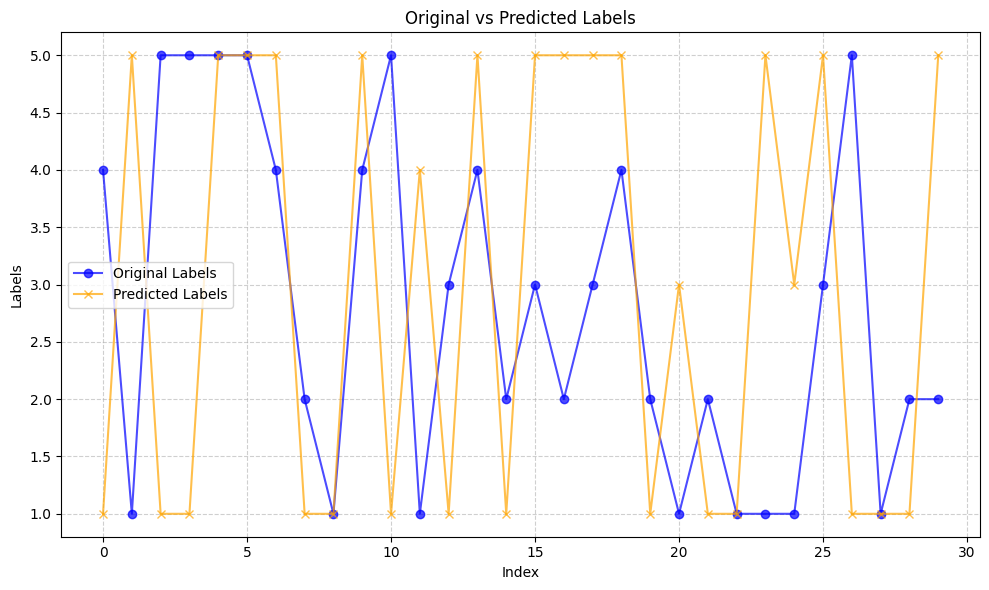

In [14]:
n = 30
indices = list(range(n))

plt.figure(figsize=(10, 6))

# Plot original labels
plt.plot(
    indices, 
    og_labels.tolist()[:n], 
    label="Original Labels", 
    color="blue", 
    marker='o', 
    linestyle='-', 
    alpha=0.7
)

# Plot predicted labels
plt.plot(
    indices, 
    pred_labels.tolist()[:n], 
    label="Predicted Labels", 
    color="orange", 
    marker='x', 
    linestyle='-', 
    alpha=0.7
)

# Adding labels and legend
plt.title("Original vs Predicted Labels")
plt.xlabel("Index")
plt.ylabel("Labels")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Display the plot
plt.show()

In [15]:
def find_best_mapping(original_labels, predicted_labels):
    """
    Finds the best label mapping that minimizes the loss function.

    Args:
        original_labels (list): Original labels.
        predicted_labels (list): Predicted labels.

    Returns:
        dict: Best mapping (original_label -> predicted_label).
        float: Minimum loss.
    """
    unique_labels = list(set(original_labels))  # Unique labels (1, 2, ..., 5)
    best_mapping = None
    min_loss = float('inf')

    # Iterate over all permutations of labels
    for perm in itertools.permutations(unique_labels):
        mapping = {original: mapped for original, mapped in zip(unique_labels, perm)}
        # Remap predicted labels
        remapped_predictions = [mapping[label] for label in predicted_labels]
        # Calculate loss (e.g., sum of differences)
        loss = sum(abs(o - p) for o, p in zip(original_labels, remapped_predictions))
        
        if loss < min_loss:
            min_loss = loss
            best_mapping = mapping

    return best_mapping, min_loss


best_mapping, min_loss = find_best_mapping(og_labels, pred_labels)
print("Best mapping:", best_mapping)
print("Minimum loss:", min_loss)


Best mapping: {np.int64(1): np.int64(3), np.int64(2): np.int64(5), np.int64(3): np.int64(1), np.int64(4): np.int64(2), np.int64(5): np.int64(4)}
Minimum loss: 14035


In [16]:
def apply_mapping(predicted_labels, mapping):
    """
    Applies label mapping to the predicted labels.

    Args:
        predicted_labels (list): Predicted labels.
        mapping (dict): Label mapping (original_label -> new_label).

    Returns:
        list: Mapped predicted labels.
    """
    return [mapping[label] for label in predicted_labels]

# Example usage
mapped_labels = apply_mapping(pred_labels, best_mapping)
print("Predicted labels after mapping:", mapped_labels)

Predicted labels after mapping: [np.int64(3), np.int64(4), np.int64(3), np.int64(3), np.int64(4), np.int64(4), np.int64(4), np.int64(3), np.int64(3), np.int64(4), np.int64(3), np.int64(2), np.int64(3), np.int64(4), np.int64(3), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(3), np.int64(1), np.int64(3), np.int64(3), np.int64(4), np.int64(1), np.int64(4), np.int64(3), np.int64(3), np.int64(3), np.int64(4), np.int64(4), np.int64(3), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(5), np.int64(3), np.int64(3), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(3), np.int64(4), np.int64(4), np.int64(3), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(3), np.int64(4), np.int64(3), np.int64(4), np.int64(3), np.int64(4), np.int64(3), np.int64(1), np.int64(4), np.int64(3), np.int64(4), np.int64(3), np.int64(3), np.int64(3), np.int64(4), np.int64(4), np.in

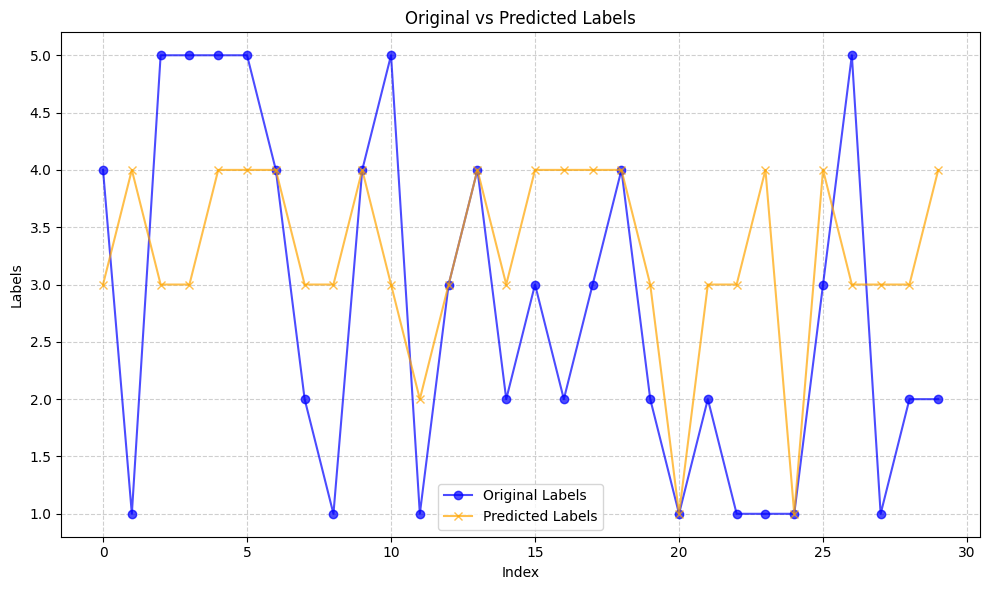

In [17]:
n = 30
indices = list(range(n))

plt.figure(figsize=(10, 6))

# Plot original labels
plt.plot(
    indices, 
    og_labels.tolist()[:n], 
    label="Original Labels", 
    color="blue", 
    marker='o', 
    linestyle='-', 
    alpha=0.7
)

# Plot mapped predicted labels
plt.plot(
    indices, 
    mapped_labels[:n], 
    label="Predicted Labels", 
    color="orange", 
    marker='x', 
    linestyle='-', 
    alpha=0.7
)

# Adding labels and legend
plt.title("Original vs Predicted Labels")
plt.xlabel("Index")
plt.ylabel("Labels")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Display the plot
plt.show()

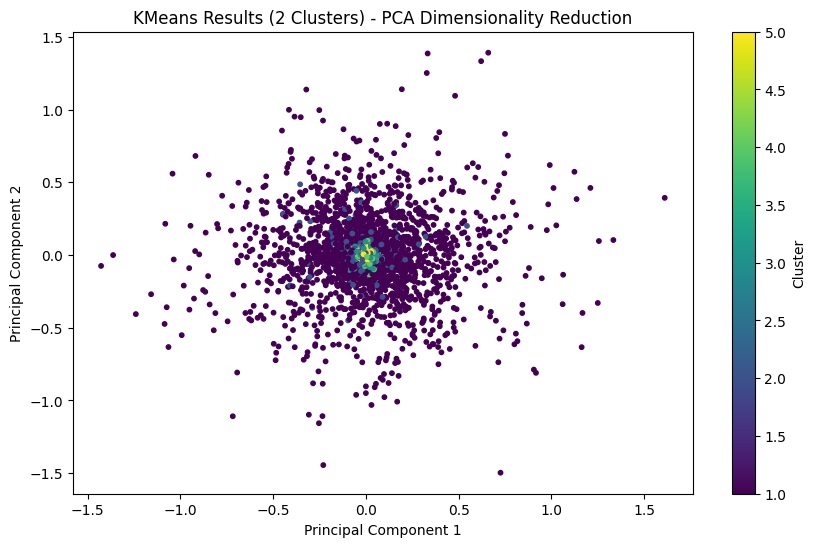

In [18]:
# Dimensionality reduction to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(array)

# Create the plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=og_labels, cmap='viridis', s=10)  # 'c' is for cluster labels, 'cmap' sets the colors
plt.title('KMeans Results (2 Clusters) - PCA Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()